In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import glob
import re

['./N2O\\mlo_N2O_Day.dat',
 './N2O\\mlo_N2O_Day_cats.dat',
 './N2O\\mlo_N2O_Day_rits.dat',
 './N2O\\nwr_N2O_Day_cats.dat',
 './N2O\\nwr_N2O_Day_rits.dat',
 './N2O\\smo_N2O_Day_cats.dat',
 './N2O\\smo_N2O_Day_rits.dat',
 './N2O\\spo_N2O_Day_cats.dat',
 './N2O\\spo_N2O_Day_rits.dat',
 './N2O\\sum_N2O_Day_cats.dat']

In [34]:
import pandas as pd
from io import StringIO

temp=u"""#  year, month, day, daily median N2O in ppb, std. dev.
N2OcatsMLOyr N2OcatsMLOmon N2OcatsMLOday N2OcatsMLOm N2OcatsMLOmsd N2OcatsMLOn
1998      11       28      nan      nan      0
1998      11       29      nan      nan      0
1998      11       30      nan      nan      0
1998      12        1      nan      nan      0
1998      12        2      nan      nan      0"""

#after testing replace StringIO(temp) to filename
df = pd.read_csv(StringIO(temp), 
                 sep="\s+", 
                 skiprows=1, 
                 usecols=[0,1,2,3,4,5], 
                 )

In [114]:
with open('.\\N2O\\mlo_N2O_Day_cats.dat', 'r') as file:
    data = file.read()

In [115]:
data

"#  file: mlo_N2O_Day.dat\n#  date: Fri, Jan 17, 2020 3:02:27 PM\n#  \n#  Nitrous Oxide (N2O) data from hourly in situ samples analyzed on a gas chromatograph located \n#  at Mauna Loa (MLO), Hawaii (19.539 N, 155.578 W, elevation: 3397 m).  \n#  \n#  Atmospheric Measurements from the NOAA/ESRL Chromatograph for Atmospheric Trace Species \n#  (CATS) Program.  This GC replaces the RITS GCs operated during the period of 1986 through 2000.\n#  This work was funded in part by the Atmospheric Chemistry Project of NOAA's Climate and\n#  Global Change Program.\n#  \n#  (PIs) Geoffrey S. Dutton, Dr. James W. Elkins, Dr. Bradley D. Hall\n#  \n#  National Oceanic and Atmospheric Administration (NOAA)\n#  Earth System Research Laboratory (ESRL)\n#  325 Broadway, R/GMD1\n#  Boulder, CO 80305-3328\n#  \n#  Email:  Geoff.Dutton@noaa.gov; James.W.Elkins@noaa.gov; Bradley.Hall@noaa.gov\n#  Phone:      (303) 497-6086      (303) 497-6224        (303) 497-7011\n#  Fax:   (303) 497-6290\n#  \n#  See (http

In [ ]:
split_data = re.split(pattern='N2O\S+yr', string=data)[1]
df_tmp = pd.read_csv(StringIO(split_data), 
             sep=('\s+'), 
             skiprows=1, 
                 usecols=[0,1,2,3,4,5], 
             engine='python')

In [33]:
df

,1998,11,28,nan,nan.1,0
0,1998,11,29,NaN,NaN,0
1,1998,11,30,NaN,NaN,0
2,1998,12,1,NaN,NaN,0
3,1998,12,2,NaN,NaN,0


Import N2O .dat files as strings, split into two components before and after the first column header
of form ''N2O``(observatory abbreviation)`` ``(Trace species)``yr'

"Trace species" is a place holder for the two observation types:
    
    1. Radiatively Important Trace Species (RITS) 
    2. Chromatograph for Atmospheric Trace Species (CATS)
    
Example: for the observatory located at Mauna Loa, Hawaii, United States (MLO) and CATS experiment, 
the corresponding string would be ``N2Omlocatsyr``

All cases are covered by regular expression ``N2O\S+yr``


In [142]:
txt = "I could eat bananas all day"

x = txt.partition("bananas")

print(x)

('I could eat ', 'bananas', ' all day')


In [155]:
for f in glob.glob('.\\N2O\\*'):
    print(f)
    with open(f, 'r') as file:
        data = file.read()
    split_data = ''.join(re.split(pattern=r'(N2O\S+yr)', string=data)[1:])
    df_tmp = pd.read_csv(StringIO(split_data), 
                 sep=('\s+'), 
#                 skiprows=1, 
#                 usecols=[0,1,2,3,4,5], 
                 engine='python')
    break
    


.\N2O\mlo_N2O_Day_cats.dat


In [164]:
df_tmp.index = pd.to_datetime(df_tmp.N2OcatsMLOyr.astype(str) + '-' + df_tmp.N2OcatsMLOmon.astype(str) + '-' + df_tmp.N2OcatsMLOday.astype(str))

In [165]:
df_tmp

,N2OcatsMLOyr,N2OcatsMLOmon,N2OcatsMLOday,N2OcatsMLOm,N2OcatsMLOmsd,N2OcatsMLOn
1998-11-28,1998,11,28,NaN,NaN,0
1998-11-29,1998,11,29,NaN,NaN,0
1998-11-30,1998,11,30,NaN,NaN,0
1998-12-01,1998,12,1,NaN,NaN,0
1998-12-02,1998,12,2,NaN,NaN,0
...,...,...,...,...,...,...
2020-01-10,2020,1,10,332.76,0.80,24
2020-01-11,2020,1,11,332.09,0.81,19
2020-01-12,2020,1,12,333.08,0.81,16
2020-01-13,2020,1,13,NaN,NaN,0


In [159]:
df_tmp.loc[:, 'N2OcatsMLOyr':'N2OcatsMLOday'].astype(str).str.cat(sep='-')

AttributeError: 'DataFrame' object has no attribute 'str'

In [62]:
df = pd.read_csv(StringIO(data), 
                 sep="\s+", 
                 skiprows=49, 
                 usecols=[0,1,2,3,4,5], 
                 )

In [33]:
df

,1998,11,28,nan,nan.1,0
0,1998,11,29,NaN,NaN,0
1,1998,11,30,NaN,NaN,0
2,1998,12,1,NaN,NaN,0
3,1998,12,2,NaN,NaN,0


In [67]:
data.split('N2OcatsSPOyr')[1]

' N2OcatsSPOmon N2OcatsSPOday N2OcatsSPOm N2OcatsSPOmsd N2OcatsSPOn\n1998       1       26   313.26     1.43     11\n1998       1       27      nan      nan      0\n1998       1       28   313.52     1.29      6\n1998       1       29   313.93     1.14      5\n1998       1       30   313.59     0.87      5\n1998       1       31   312.52     0.75      9\n1998       2        1   312.67     0.62     12\n1998       2        2   312.57     0.60     12\n1998       2        3   312.98     0.59     12\n1998       2        4   312.87     0.72      9\n1998       2        5   312.42     0.85      6\n1998       2        6      nan      nan      0\n1998       2        7      nan      nan      0\n1998       2        8      nan      nan      0\n1998       2        9      nan      nan      0\n1998       2       10   312.71     1.04     11\n1998       2       11   313.06     1.04     12\n1998       2       12   313.36     1.09      5\n1998       2       13   312.52     1.07     10\n1998       2       

In [ ]:
N2OritsSMOyr

' N2OcatsSPOmon N2OcatsSPOday N2OcatsSPOm N2OcatsSPOmsd N2OcatsSPOn\n1998       1       26   313.26     1.43     11\n1998       1       27      nan      nan      0\n1998       1       28   313.52     1.29      6\n1998       1       29   313.93     1.14      5\n1998       1       30   313.59     0.87      5\n1998       1       31   312.52     0.75      9\n1998       2        1   312.67     0.62     12\n1998       2        2   312.57     0.60     12\n1998       2        3   312.98     0.59     12\n1998       2        4   312.87     0.72      9\n1998       2        5   312.42     0.85      6\n1998       2        6      nan      nan      0\n1998       2        7      nan      nan      0\n1998       2        8      nan      nan      0\n1998       2        9      nan      nan      0\n1998       2       10   312.71     1.04     11\n1998       2       11   313.06     1.04     12\n1998       2       12   313.36     1.09      5\n1998       2       13   312.52     1.07     10\n1998       2       

In [3]:
dir_ =  'C:\\Users\\Matt\\Desktop\\statmethods\\group_project\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports\\format0\\'
file = dir_ + '01-23-2020.csv'

In [4]:
dir_ =  'C:\\Users\\Matt\\Desktop\\statmethods\\group_project\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports\\format0\\'
file = dir_ + '01-23-2020.csv'

In [5]:
dir0 = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports\\format0\\'
dir1 = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports\\format1\\'
dir2 = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports\\format2\\'

In [3]:
global_cases = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_global.csv'

In [103]:
uc =  '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_US.csv'
ud =  '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_deaths_US.csv'
ur =  '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_US.csv'

In [104]:
popdat = pd.read_csv('population-figures-by-country-csv_csv.csv')

In [105]:
us_cases = pd.read_csv(uc)
us_deaths = pd.read_csv(ud)
us_recovered = pd.read_csv(ur)

In [106]:
dead=us_deaths[us_deaths['Province_State'].isin(['Michigan', 'Georgia', 'New York'])].groupby(by='Province_State').sum().loc[:,'1/22/20':]#.iloc[:, 4:].transpose().columns
confirmed=us_cases[us_cases['Province_State'].isin(['Michigan', 'Georgia', 'New York'])].groupby(by='Province_State').sum().loc[:,'1/22/20':]
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Georgia,0,0,0,0,0,0,0,0,0,0,...,1525,2000,2366,2651,2808,3929,4638,5348,5831,6160
Michigan,0,0,0,0,0,0,0,0,0,0,...,2845,3634,4650,5488,6498,7615,9315,10791,12744,14225
New York,0,0,0,0,0,0,0,0,0,0,...,37877,44876,52410,59648,66663,75833,83948,92506,102987,113833


In [107]:
rate = dead / confirmed

<Figure size 2000x2000 with 0 Axes>

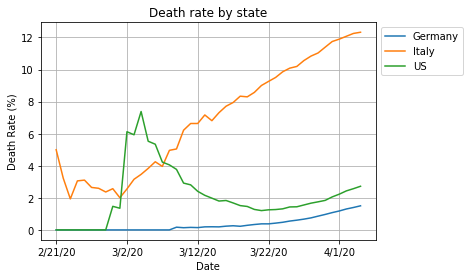

In [181]:
fig = plt.figure(figsize=(10,10), dpi=200)
(100*rate.loc[:, '2/21/20':]).transpose().plot().legend(bbox_to_anchor=(1, 1))
_ = plt.xlabel('Date')
_ = plt.ylabel('Death Rate (%)')
plt.grid(True, axis='both')
plt.title('Death rate by state')
plt.savefig('death_rate_NY_MI_GA.png', bbox_inches='tight')

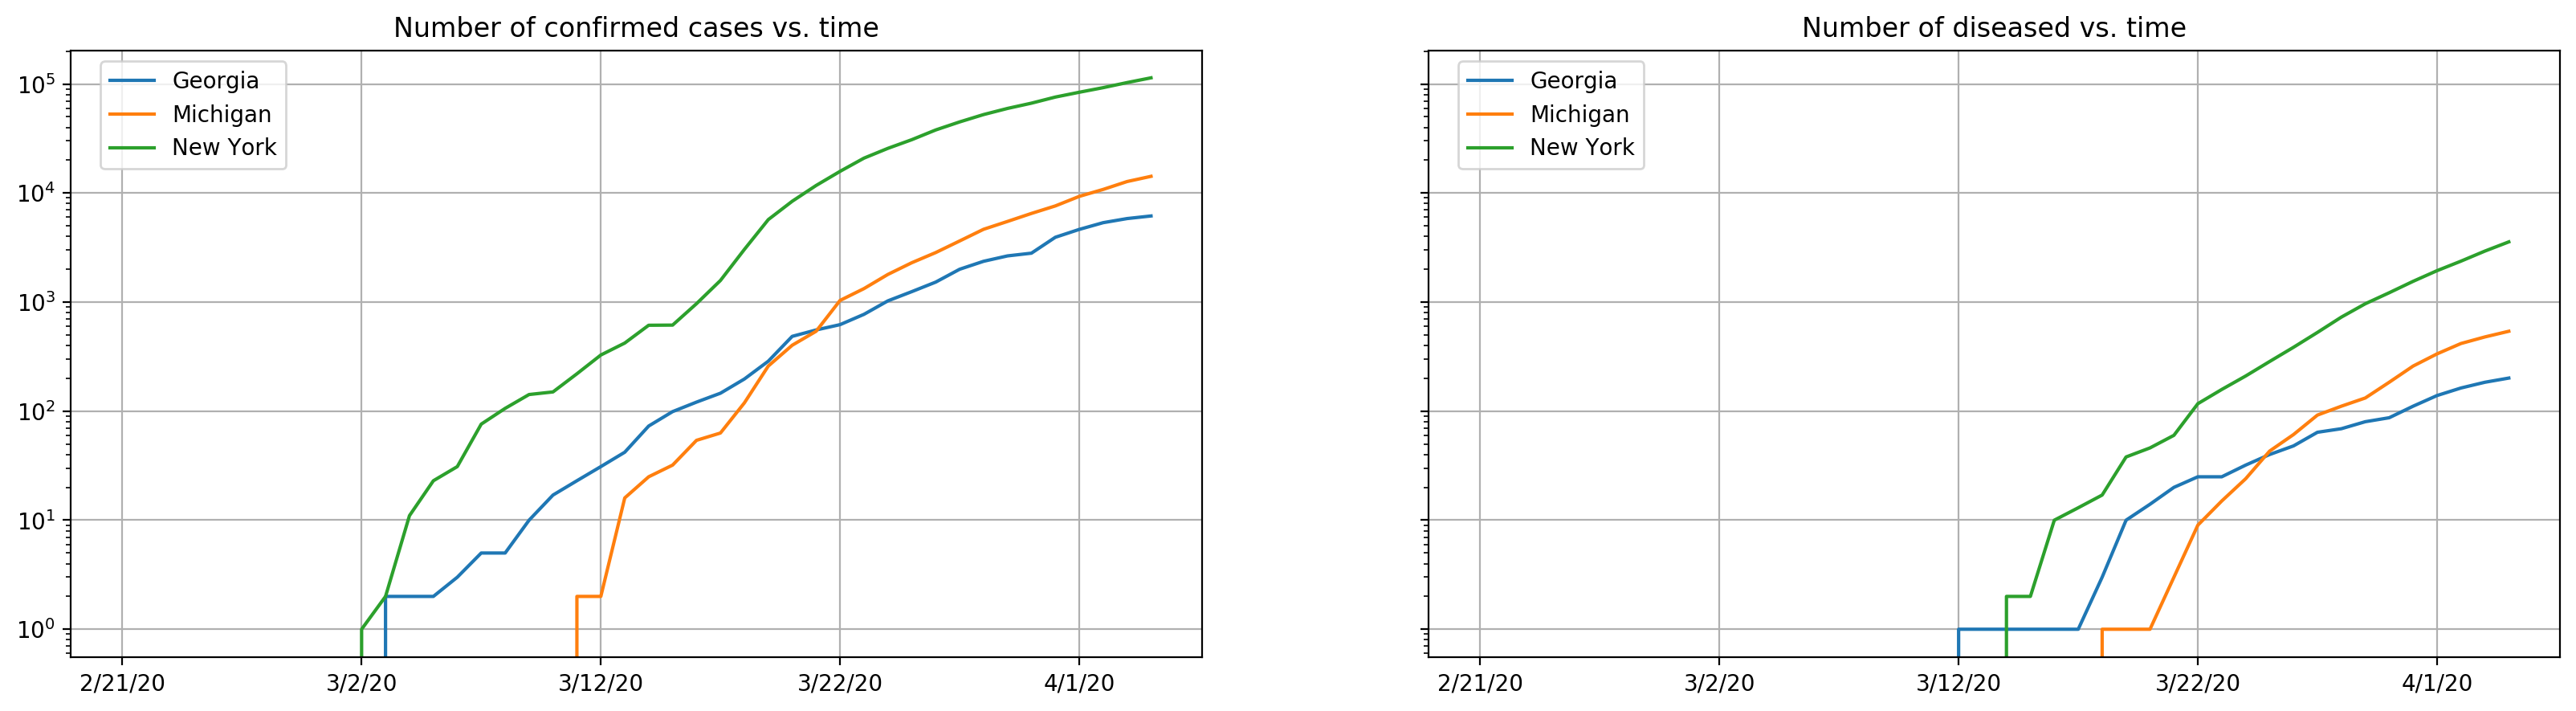

In [169]:
fig, (ax,ax2) = plt.subplots(1, 2, sharey=True,  figsize=(20,5), dpi=200)
confirmed.loc[:, '2/21/20':].transpose().plot(ax=ax).legend(bbox_to_anchor=(0.2, 1))
dead.loc[:, '2/21/20':].transpose().plot(ax=ax2).legend(bbox_to_anchor=(0.2, 1))
ax.set_yscale('log')
ax2.set_yscale('log')
ax.set_title('Number of confirmed cases vs. time')
ax2.set_title('Number of diseased vs. time')
ax.grid(True, axis='both')
ax2.grid(True, axis='both')
plt.savefig('cases_vs_dead_comparison_GA_NY_MI.png', bbox_inches='tight')

In [109]:
i=-1
for c in u.columns[::-1]:
    try:
        pd.to_datetime(c)
        i-=1
    except:
        break

In [8]:

testdat = pd.read_csv('full-list-cumulative-total-tests-per-million.csv')

In [9]:
testdat[testdat.Entity.apply(lambda x : x.count('United States')>0)].reset_index(drop=True)

,Entity,Code,Date,Cumulative total tests per million
0,United States - inconsistent units (COVID Trac...,NaN,"Mar 5, 2020",3.406435
1,United States - inconsistent units (COVID Trac...,NaN,"Mar 6, 2020",5.412883
2,United States - inconsistent units (COVID Trac...,NaN,"Mar 7, 2020",6.487011
3,United States - inconsistent units (COVID Trac...,NaN,"Mar 8, 2020",8.303374
4,United States - inconsistent units (COVID Trac...,NaN,"Mar 9, 2020",11.921014
...,...,...,...,...
92,United States - specimens tested (CDC),NaN,"Mar 21, 2020",317.791125
93,United States - specimens tested (CDC),NaN,"Mar 22, 2020",332.101773
94,United States - specimens tested (CDC),NaN,"Mar 23, 2020",358.224815
95,United States - specimens tested (CDC),NaN,"Mar 24, 2020",383.656915


In [11]:
u.set_index('Province_State').index.nunique()

58

In [88]:
def top_5_counties(state_df, state_name):
    state = state_df[(state_df.Province_State==state_name)]
    state = state.drop(columns=['UID','iso2','iso3','code3','FIPS','Country_Region','Lat','Long_','Combined_Key','Province_State'])
    top5_counties = state.groupby(by='Admin2').sum().sum(axis=1).sort_values(ascending=False)[:5].index.tolist()
    state_info = state[state.Admin2.isin(top5_counties)].set_index('Admin2').transpose()
    state_info.columns.name = 'County'
    return state_info


In [89]:
x = top_5_counties(u, 'Michigan')

In [ ]:
not_of_interest = ['UID','iso2','iso3','code3','FIPS','Admin2','Country_Region','Lat','Long_','Combined_Key']

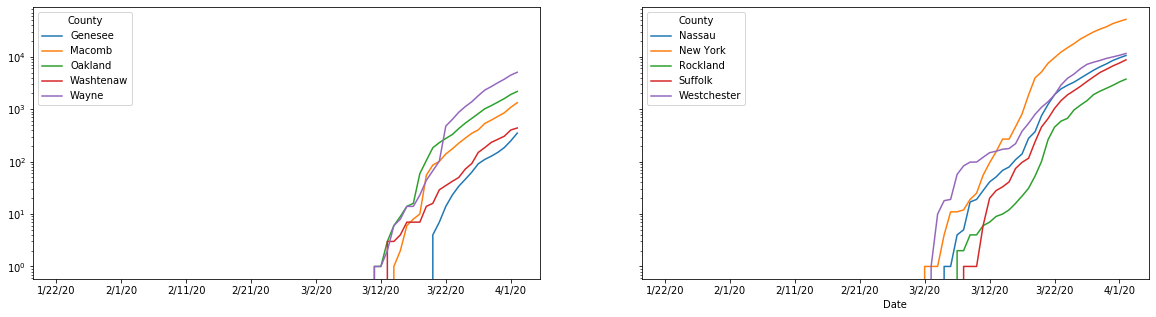

In [103]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(20,5), sharey=True)
top_5_counties(u, 'Michigan').plot(ax=ax)
top_5_counties(u, 'New York').plot(ax=ax2)
_ = plt.yscale('log')
_ = plt.xlabel('Date')
_ = plt.ylabel('No. Cases')

In [38]:
mich = u[(u.Province_State=='Michigan')]
mich = mich.drop(columns=['UID','iso2','iso3','code3','FIPS','Country_Region','Lat','Long_','Combined_Key','Province_State'])

In [46]:
michtop5_counties = mich.groupby(by='Admin2').sum().sum(axis=1).sort_values(ascending=False)[:5].index.tolist()

In [ ]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(20,5), sharey=True)
top_5_counties(u, 'Michigan').plot(ax=ax)
top_5_counties(u, 'New York').plot(ax=ax2)
_ = plt.yscale('log')
_ = plt.xlabel('Date')
_ = plt.ylabel('No. Cases')

In [239]:
top_5_counties(u, 'Michigan').sum(axis=1)

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
3/29/20    4854
3/30/20    5704
3/31/20    6669
4/1/20     8118
4/2/20     9371
Length: 72, dtype: int64

In [245]:
top_5_counties(u, 'Michigan').transpose().replace(0, np.nan).bfill(1).iloc[:, 0]

County
Genesee      4.0
Macomb       1.0
Oakland      1.0
Washtenaw    3.0
Wayne        1.0
Name: 1/22/20, dtype: float64

In [269]:
timeseries = pd.concat((top_5_counties(u, 'New York').loc['3/2/20':, :], top_5_counties(u, 'Michigan').loc['3/11/20':, :]),axis=1).replace(to_replace=0, value=np.nan)

In [274]:
rotations = timeseries.isna().sum().tolist()

timeseries2 = timeseries.copy()
for i, c in enumerate(timeseries2.columns):
    timeseries2[c]=np.roll(timeseries2[c], -rotations[i],axis=0)

In [303]:
tmp = timeseries2.Oakland
timeseries2=timeseries2.drop(columns='Oakland')

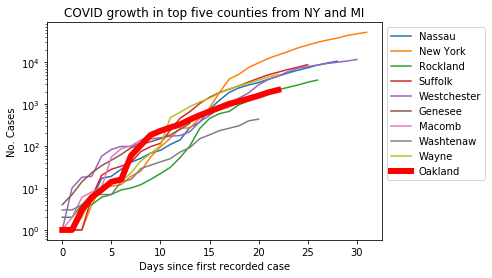

In [444]:
ax = timeseries2.reset_index(drop=True).plot()#.legend()
_  = tmp.reset_index(drop=True).plot(color='r', ax=ax, linewidth=6, label='Oakland')
plt.legend(bbox_to_anchor=(1, 1))
_ = plt.yscale('log')
_ = plt.ylabel('No. Cases')
_ = plt.xlabel('Days since first recorded case')
_ = plt.title('COVID growth in top five counties from NY and MI')

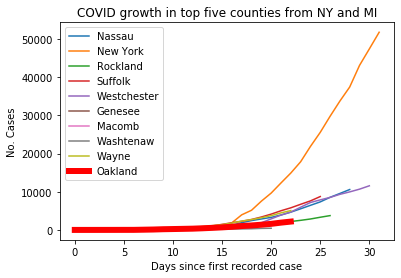

In [439]:
ax = timeseries2.reset_index(drop=True).plot()#.legend(bbox_to_anchor=(1, 1))
_  = tmp.reset_index(drop=True).plot(color='r', ax=ax, linewidth=6,label='Oakland')
plt.legend()
_ = plt.ylabel('No. Cases')
_ = plt.xlabel('Days since first recorded case')
_ = plt.title('COVID growth in top five counties from NY and MI')

In [246]:
top_5_counties(u, 'New York').transpose().replace(0, np.nan).bfill(1).iloc[:, 0]

County
Nassau         1.0
New York       1.0
Rockland       2.0
Suffolk        1.0
Westchester    1.0
Name: 1/22/20, dtype: float64

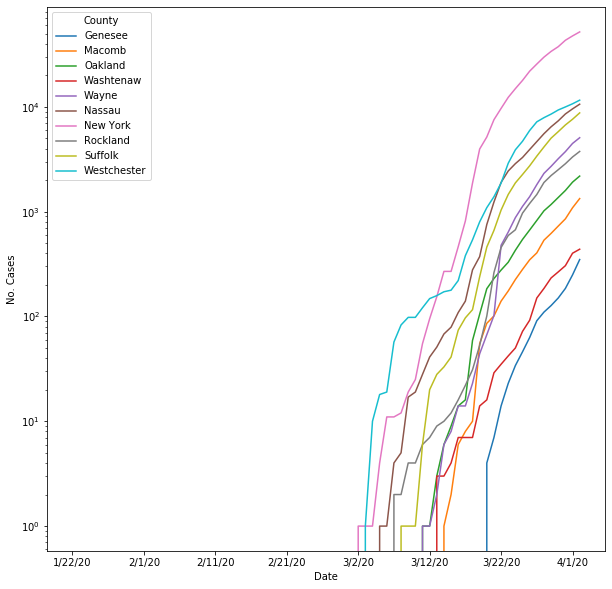

In [108]:
# fig = plt.figure()
ax = top_5_counties(u, 'Michigan').plot(figsize=(10,10))
top_5_counties(u, 'New York').plot(ax=ax)
_ = plt.yscale('log')
_ = plt.xlabel('Date')
_ = plt.ylabel('No. Cases')

In [191]:
from scipy.special import smirnov,kolmogorov, kolmogi

In [196]:
?kolmogorov

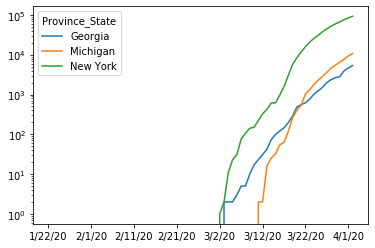

In [336]:
compare = u[(u.Province_State=='Michigan') | (u.Province_State=='New York') | (u.Province_State=='Georgia')]
ctest = compare.drop(columns=not_of_interest).groupby('Province_State').sum().transpose()#.plot()
_ = ctest.plot()
plt.yscale('log')

In [344]:
ctest.replace(to_replace=0, value=np.nan).isna().sum()

Province_State
Georgia     41
Michigan    49
New York    40
dtype: int64

In [345]:
ctest=ctest.replace(to_replace=0, value=np.nan)
rotations = ctest.isna().sum().tolist()
ctest2 = ctest.copy()
for i, c in enumerate(ctest2.columns):
    ctest2[c]=np.roll(ctest2[c], -rotations[i],axis=0)

In [347]:
ctest2.columns.name = None

In [348]:
ctest2

,Georgia,Michigan,New York
1/22/20,2.0,2.0,1.0
1/23/20,2.0,2.0,2.0
1/24/20,2.0,16.0,11.0
1/25/20,3.0,25.0,23.0
1/26/20,5.0,32.0,31.0
...,...,...,...
3/29/20,NaN,NaN,NaN
3/30/20,NaN,NaN,NaN
3/31/20,NaN,NaN,NaN
4/1/20,NaN,NaN,NaN


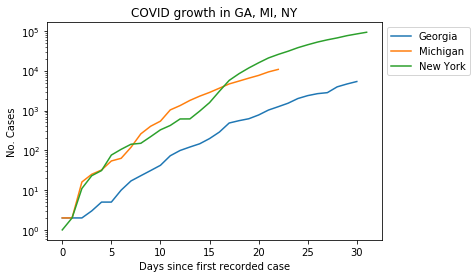

In [437]:
ctest2.reset_index(drop=True).plot().legend(bbox_to_anchor=(1, 1))
_ = plt.yscale('log')
_ = plt.ylabel('No. Cases')
_ = plt.xlabel('Days since first recorded case')
_ = plt.title('COVID growth in GA, MI, NY')

In [ ]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax.plot(nedcf, label='New York')
ax.plot(medcf, label='Michigan')
_ = ax.legend()
ax.set_ylabel('No. Cases')
ax.set_xlabel('No. days since first recorded case')

ax2.plot(nedcf, label='New York')
ax2.plot(medcf, label='Michigan')
_ = ax2.legend()
ax2.set_ylabel('No. Cases')
ax2.set_xlabel('No. days since first recorded case')
ax2.set_yscale('log')

In [332]:
stateagg = compare.drop(columns=not_of_interest).groupby('Province_State').sum().astype(float)#.apply(np.log10)
# stateagg['Michigan']
stateagg.index.name = None

In [227]:
mval = stateagg.transpose().values[:, 0]
nval = stateagg.transpose().values[:, 1]

In [228]:
nedcf = nval[-31:]
# nedcf = nedcf/nedcf.max()

In [229]:
medcf = np.roll(mval,-8)[-31:]
# medcf = medcf/medcf.max()

In [230]:
medcf

array([2.0000e+00, 2.0000e+00, 1.6000e+01, 2.5000e+01, 3.2000e+01,
       5.4000e+01, 6.3000e+01, 1.1900e+02, 2.5900e+02, 4.0200e+02,
       5.4000e+02, 1.0350e+03, 1.3290e+03, 1.7930e+03, 2.2960e+03,
       2.8450e+03, 3.6340e+03, 4.6500e+03, 5.4880e+03, 6.4980e+03,
       7.6150e+03, 9.3150e+03, 1.0791e+04, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00])

In [231]:
medcf[np.where(medcf==0)]=np.nan

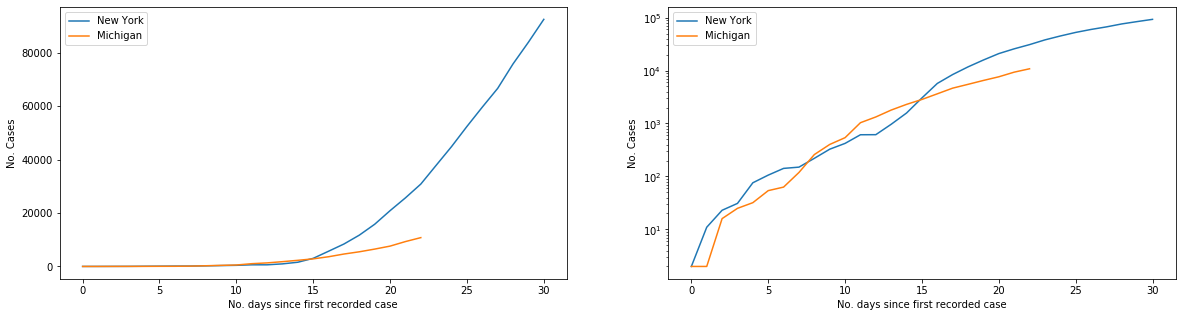

In [236]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax.plot(nedcf, label='New York')
ax.plot(medcf, label='Michigan')
_ = ax.legend()
ax.set_ylabel('No. Cases')
ax.set_xlabel('No. days since first recorded case')

ax2.plot(nedcf, label='New York')
ax2.plot(medcf, label='Michigan')
_ = ax2.legend()
ax2.set_ylabel('No. Cases')
ax2.set_xlabel('No. days since first recorded case')
ax2.set_yscale('log')

In [12]:
not_of_interest = ['UID','iso2','iso3','code3','FIPS','Admin2','Country_Region','Lat','Long_','Combined_Key']

In [17]:
u.drop(columns=not_of_interest).groupby('Province_State').sum().transpose().apply(np.log10).replace(to_replace=-np.inf, value=0)

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/23/20,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/24/20,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/25/20,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/26/20,0.000000,0.000000,0.0,0.000000,0.000000,0.301030,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/29/20,2.916454,2.008600,0.0,2.963316,2.629410,3.767304,3.363048,3.299507,2.365488,1.690196,...,3.235528,3.445915,2.857332,2.371068,0.000000,2.949390,3.649821,2.053078,3.065953,1.934498
3/30/20,2.953760,2.056905,0.0,3.063333,2.674861,3.853577,3.363800,3.410102,2.421604,1.690196,...,3.282622,3.497897,2.905256,2.408240,0.000000,3.008600,3.692230,2.161368,3.089905,1.973128
3/31/20,2.994317,2.075547,0.0,3.110253,2.718502,3.914343,3.472171,3.495267,2.503791,1.690196,...,3.378580,3.580811,2.948413,2.466868,1.477121,3.096562,3.734960,2.209515,3.149835,2.037426
4/1/20,3.025306,2.120574,0.0,3.184691,2.766413,3.973082,3.474508,3.551084,2.565848,1.690196,...,3.467312,3.638988,2.948413,2.506505,1.477121,3.171141,3.748808,2.281033,3.192010,2.113943


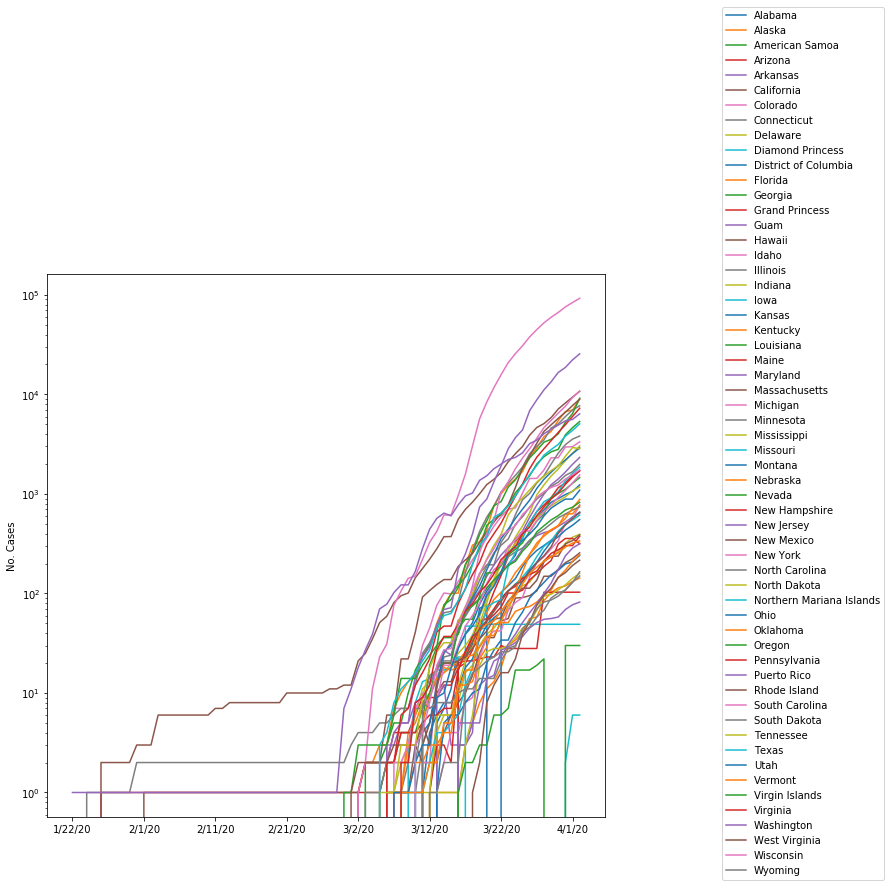

In [405]:
# u.drop(columns=not_of_interest).groupby('Province_State').sum().transpose().apply(np.log10).replace(to_replace=-np.inf, value=0).plot(figsize=(10,10)).legend(bbox_to_anchor=(1.2, 1.5))
u.drop(columns=not_of_interest).groupby('Province_State').sum().transpose().plot(figsize=(10,10)).legend(bbox_to_anchor=(1.2, 1.5))
plt.ylabel('No. Cases')
# plt.yticks([10**1,10**2,10**3])
plt.yscale('log')

In [406]:
# top ten states
u.drop(columns=not_of_interest).groupby('Province_State').sum().sum(axis=1).sort_values(ascending=False)[:10].index

Index(['New York', 'New Jersey', 'California', 'Michigan', 'Washington',
       'Massachusetts', 'Florida', 'Illinois', 'Louisiana', 'Pennsylvania'],
      dtype='object', name='Province_State')

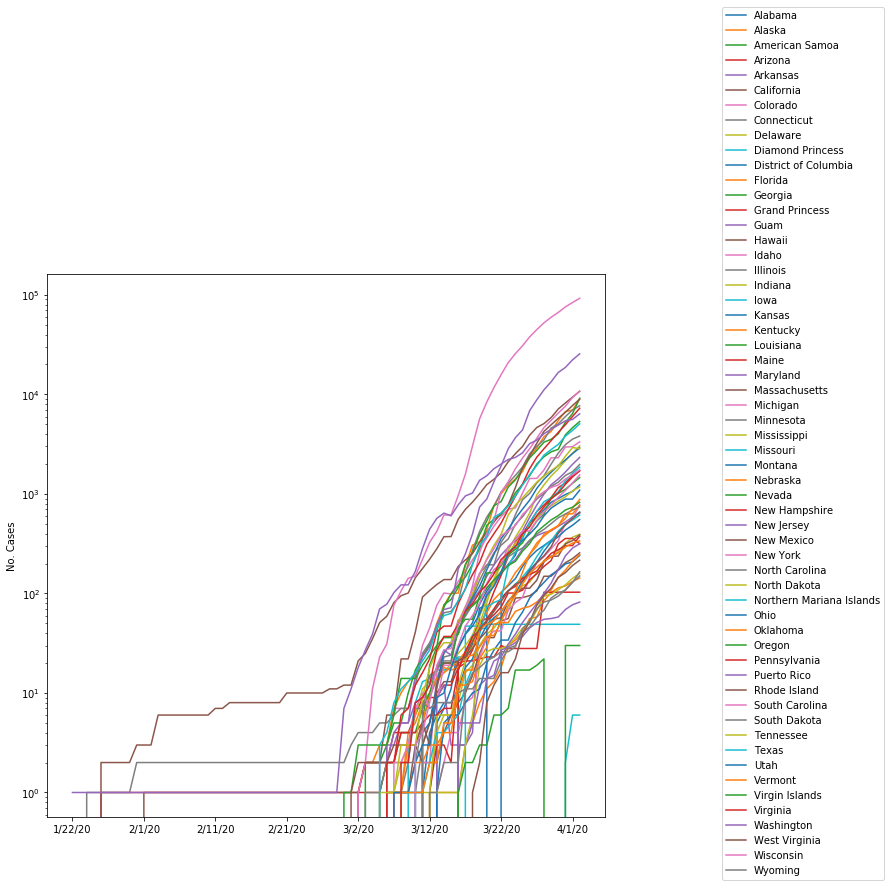

In [407]:
# u.drop(columns=not_of_interest).groupby('Province_State').sum().transpose().apply(np.log10).replace(to_replace=-np.inf, value=0).plot(figsize=(10,10)).legend(bbox_to_anchor=(1.2, 1.5))
u.drop(columns=not_of_interest).groupby('Province_State').sum().transpose().plot(figsize=(10,10)).legend(bbox_to_anchor=(1.2, 1.5))
plt.ylabel('No. Cases')
# plt.yticks([10**1,10**2,10**3])
plt.yscale('log')

In [ ]:
['UID',
 'iso2',
 'iso3',
 'code3',
 'FIPS',
 'Admin2',
 'Country_Region',
 'Lat',
 'Long_',
 'Combined_Key']

In [526]:
u[u.Province_State=='Wyoming']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
3124,84056001,US,USA,840,56001.0,Albany,Wyoming,US,41.654987,-105.723541,...,0,1,1,1,1,1,1,1,3,3
3125,84056003,US,USA,840,56003.0,Big Horn,Wyoming,US,44.524051,-107.996037,...,0,0,0,0,0,0,0,0,0,0
3126,84056005,US,USA,840,56005.0,Campbell,Wyoming,US,44.248861,-105.547440,...,1,1,1,1,1,1,1,2,4,6
3127,84056007,US,USA,840,56007.0,Carbon,Wyoming,US,41.693578,-106.932608,...,2,3,3,3,3,3,3,3,3,3
3128,84056009,US,USA,840,56009.0,Converse,Wyoming,US,42.972723,-105.508185,...,0,0,0,0,1,1,1,1,2,2
3129,84056011,US,USA,840,56011.0,Crook,Wyoming,US,44.588551,-104.569771,...,0,0,0,0,0,0,0,0,0,0
3130,84056013,US,USA,840,56013.0,Fremont,Wyoming,US,43.041840,-108.629689,...,10,13,14,17,20,23,24,25,25,26
3131,84056015,US,USA,840,56015.0,Goshen,Wyoming,US,42.087982,-104.353474,...,0,0,0,1,1,1,1,1,1,1
3132,84056017,US,USA,840,56017.0,Hot Springs,Wyoming,US,43.719307,-108.442317,...,0,0,0,0,0,0,0,0,0,0
3133,84056019,US,USA,840,56019.0,Johnson,Wyoming,US,44.040572,-106.584517,...,0,0,1,4,5,5,5,7,7,8


In [419]:
u.groupby(by='Province_State').sum().sort_values(by='4/2/20').iloc[:,5:]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Province_State,,,,,,,,,,,,,,,,,,,,,
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Northern Mariana Islands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,6,6
Virgin Islands,0,0,0,0,0,0,0,0,0,0,...,17,17,17,19,22,0,0,30,30,30
Diamond Princess,0,0,0,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49
Guam,0,0,0,0,0,0,0,0,0,0,...,32,37,45,51,55,56,58,69,77,82
Grand Princess,0,0,0,0,0,0,0,0,0,0,...,28,28,28,28,103,103,103,103,103,103
Alaska,0,0,0,0,0,0,0,0,0,0,...,34,41,56,58,85,102,114,119,132,143
Wyoming,0,0,0,0,0,0,0,0,0,0,...,29,44,53,70,82,86,94,109,130,150
North Dakota,0,0,0,0,0,0,0,0,0,0,...,36,45,51,68,94,98,109,122,142,159


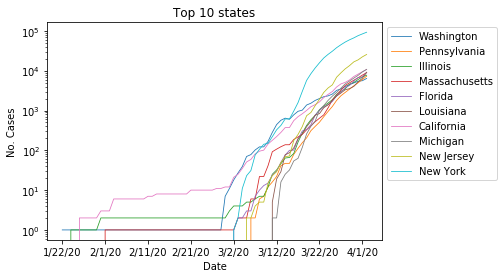

In [436]:
u.groupby(by='Province_State').sum().sort_values(by='4/2/20').iloc[:,5:].iloc[-10:, :].transpose().plot(linewidth=0.8).legend(bbox_to_anchor=(1, 1))
plt.yscale('log')
plt.ylabel('No. Cases')
plt.xlabel('Date')
_ = plt.title('Top 10 states')

In [10]:
g = pd.read_csv(global_cases)

In [173]:
gc = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_global.csv'
gd = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_deaths_global.csv'
gr = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_recovered_global.csv'

In [174]:
global_confirmed = pd.read_csv(gc)
global_dead = pd.read_csv(gd)
global_recovered = pd.read_csv(gr)

In [175]:
dead=global_dead[global_dead['Country/Region'].isin(['Germany', 'Italy', 'US'])].set_index('Country/Region').loc[:,'1/22/20':]#.iloc[:, 4:].transpose().columns
confirmed=global_confirmed[global_confirmed['Country/Region'].isin(['Germany', 'Italy', 'US'])].set_index('Country/Region').loc[:,'1/22/20':]#.iloc[:, 4:].transpose().columns

In [176]:
rate = dead/confirmed

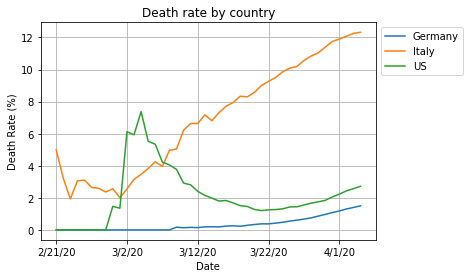

In [180]:
(100*rate.loc[:, '2/21/20':]).transpose().plot().legend(bbox_to_anchor=(1, 1))
_ = plt.xlabel('Date')
_ = plt.ylabel('Death Rate (%)')
plt.grid(True, axis='both')
plt.title('Death rate by country')
plt.savefig('death_rate_GR_ITA_USA.png', bbox_inches='tight')

In [68]:
global_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,2,2,2,2,2,5,5,10,10,10
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,17,31,31,33,44,52,67,76,89,99
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,29,29,31,31,37,46,61,61,62,90
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1,1,1,1,10,10,10,10,16,21
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
global_dead['type']='Dead'
global_confirmed['type']='Confirmed'
global_recovered['type']='Recovered'

In [76]:
global_dead = global_dead.sort_index(axis=1)
global_confirmed = global_confirmed.sort_index(axis=1)
global_recovered = global_recovered.sort_index(axis=1)

In [135]:
g11 = pd.concat((g.groupby(by='Country/Region').sum().iloc[:,2:].sort_values(by='4/2/20').iloc[-10:, :], 
           g.groupby(by='Country/Region').sum().iloc[:,2:].loc['Korea, South'].to_frame(name='South Korea').transpose()),axis=0).transpose()

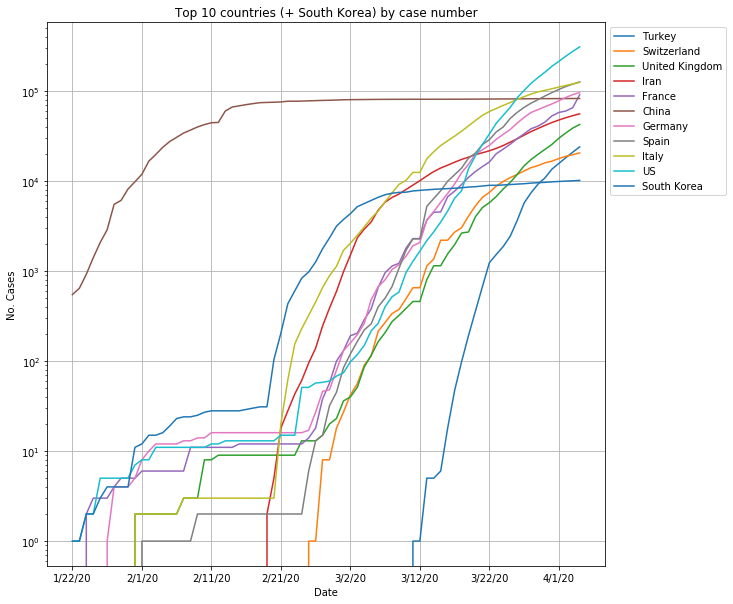

In [178]:
g11.plot(figsize=(10,10)).legend(bbox_to_anchor=(1, 1))
plt.yscale('log')
plt.ylabel('No. Cases')
plt.xlabel('Date')
plt.grid(True, axis='both')
plt.title('Top 10 countries (+ South Korea) by case number')
plt.savefig('top_10_countries.png', bbox_inches='tight')

In [143]:
dsum = global_dead.groupby('Country/Region').sum().iloc[:,2:].sum()

In [144]:
csum = global_confirmed.groupby('Country/Region').sum().iloc[:,2:].sum()

In [147]:
drsum = 100*dsum/csum

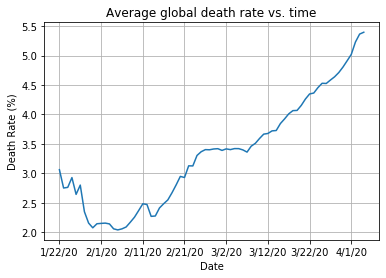

In [179]:
drsum.plot()
_ = plt.xlabel('Date')
_ = plt.ylabel('Death Rate (%)')
_ = plt.title('Average global death rate vs. time')
plt.grid(True, axis='both')
plt.savefig('death_rate_global.png', bbox_inches='tight')

In [ ]:
gdates = g[g['Country/Region']=='US'].iloc[:, 4:].transpose()
gdates.columns = g[g['Country/Region']=='US']['Province/State'].tolist()
(gdates-np.roll(gdates, 1, axis=0)).iloc[1:, :].sum(axis=1).plot()#.sum(axis=1).plot()